In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import json
import os
import scipy.stats as stats

import statsmodels.api as sm
s=json.load(open('pui.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

AttributeError: 'str' object has no attribute 'head'

In [3]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [5]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(allfemales['all'],s=300,figsize=(16,16),diagonal='kde')


In [ ]:
scatter_matrix(allmales['all'],s=300,figsize=(16,16),diagonal='kde')


In [72]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
            
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)
                        

C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
MaleMedInc = []
MaleMedInc = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
     allmales['black']['Median income'][1], allmales['asian']['Median income'][1], allmales['hispanic']['Median income'][1]]
FemaleMedInc = []
FemaleMedInc = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
    allfemales['black']['Median income'][1], allfemales['asian']['Median income'][1], allfemales['hispanic']['Median income'][1]]

In [74]:
X=FemaleMedInc
Y=MaleMedInc

In [75]:
print X, Y

[22063.0, 23780.0, 20044.0, 24840.0, 17762.0] [35228.0, 40122.0, 24855.0, 40153.0, 25411.0]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           3.77e-05
Time:                        17:02:13   Log-Likelihood:                -47.733
No. Observations:                   5   AIC:                             97.47
Df Residuals:                       4   BIC:                             97.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5413      0.078     19.885      0.0

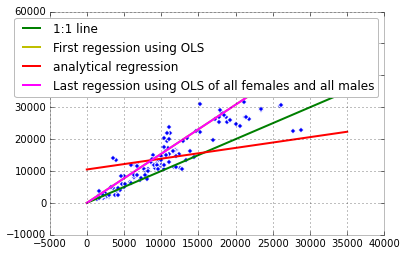

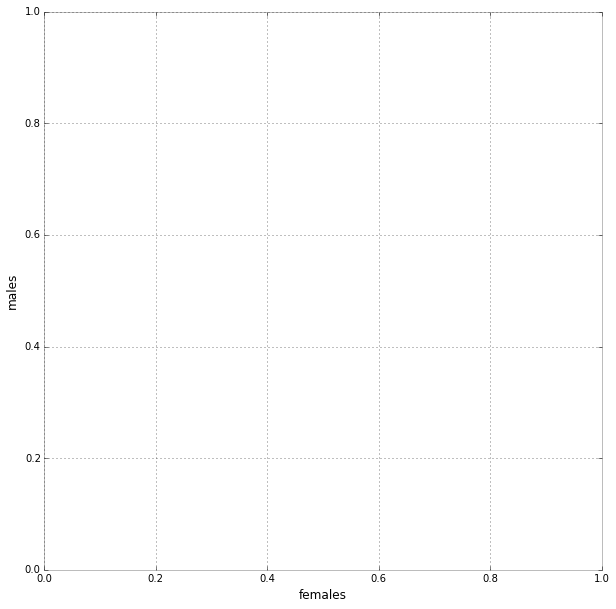

In [116]:
ax1=plt.subplot()
fig=figure(figsize=(100,100))

#ax1.scatter(X,Y)
x=np.linspace(0,35000,1000)
y=x
model=sm.OLS(Y,X)

results=model.fit()
print results.summary()
fig1=figure(figsize=(10,10))
#m=sm.add_constant(X)
x1=np.linspace(0,35000,1000)
y1=1.54*x 
#k=sm.graphics.plot_fit(results, 0, ax=ax1)

ax1.plot(x,y,color='g',label='1:1 line')
ax1.plot(x1,y1,color='y',label='First regession using OLS')


cor = stats.spearmanr(X,Y)
std(Y)/std(X)
beta1=cor[0]*std(X)/std(Y)
beta0=mean(X)-beta1*mean(Y)

#ax1=plt.subplot()

#ax1.scatter(X,Y)
x2=np.linspace(0,35000,1000)
y2=beta1*x +beta0
ax1.plot(x2,y2,color='r',label='analytical regression')


all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())
allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

ax1.scatter(all_females,all_males)
##x=np.linspace(0,35000,1000)
#y=x
model=sm.OLS(all_males.mask,all_females.mask)
x4=np.linspace(0,35000,1000)
y4=1*x4
ax1.plot(x1,y1,color='magenta',label='Last regession using OLS of all females and all males')

results=model.fit()
print results.summary()

ax1.legend()
#plt.xlabel('females')
#plt.ylabel('males')
plt.show()

In [77]:

cor = stats.spearmanr(X,Y)
std(Y)/std(X)
beta1=cor[0]*std(X)/std(Y)
beta0=mean(X)-beta1*mean(Y)

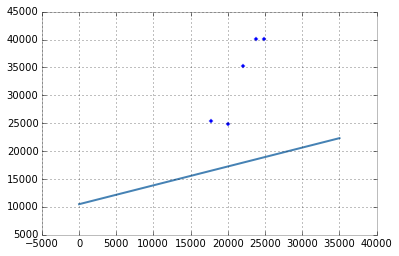

In [78]:
ax1=plt.subplot()

ax1.scatter(X,Y)
x2=np.linspace(0,35000,1000)
y2=beta1*x +beta0
ax1.plot(x2,y2)

In [79]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())
allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [81]:
len(all_females.mask)

245

In [87]:
all_females.mask

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False,

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        16:19:11   Log-Likelihood:                    inf
No. Observations:                 245   AIC:                              -inf
Df Residuals:                     244   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0000          0        inf      0.0

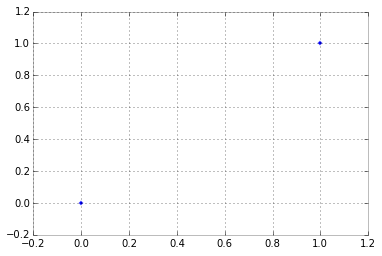

In [89]:
ax1=plt.subplot()

ax1.scatter(all_females.mask,all_males.mask)
##x=np.linspace(0,35000,1000)
#y=x
model=sm.OLS(all_males.mask,all_females.mask)
results=model.fit()
print results.summary()


plt.show()